# Prédiction des différentes sources d'énergie

Dans ce notebook, nous allons nous intéresser aux différentes sources d'énergie afin de prédire leur utilisation au 8 décembre 2022.

In [3]:
# Import des librairies
import pandas as pd
import pooch 
import os
import matplotlib.pyplot as plt
import pylab

# Paramètres d'affichage
pylab.style.use('fivethirtyeight') 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (14, 6),
          'lines.linewidth': 1.5,
          'axes.labelsize': 'x-large',
          'axes.titlesize':25,
          'axes.titleweight':'bold',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

C:\Users\Pauline\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Nous avons récolté nos données sur le site OPENDATA RESAUX-ENERGIES (https://opendata.reseaux-energies.fr/) qui retrace les différentes consommations depuis un certain nombre d'années. 


In [4]:
# Préparation de notre jeu de données
cons = pd.read_csv('eco2mix-national-cons-def.csv', delimiter=';')
cons = cons.set_index('Date')
#print(cons.head(10))

data = cons.loc[["2021-12-08", "2020-12-08", "2019-12-08", "2018-12-08", "2017-12-08"
                 , "2016-12-08", "2015-12-08", "2014-12-08", "2013-12-08"
                 , "2012-12-08"]]
#print(data)


C:\Users\Pauline\AppData\Local\Temp\ipykernel_13356\1064077699.py:2: DtypeWarning: Columns (23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  cons = pd.read_csv('eco2mix-national-cons-def.csv', delimiter=';')


Afin de prédire au mieux chaque source d'énergie, nous avons choisi de récolter seulement les données datant du 8 décembre de chaque année disponible. 
En effet, nous savons que la moyenne empirique tend vers l'espérance. 
Nous avons donc fait le choix d'estimer chaque consommation du 8 décembre par son espérance, elle-même estimée par la moyenne empirique.

Nous sommes conscient que ce n'est pas la meilleure prédiction possible, il faudrait également prendre en compte les températures annoncées, l'augmentation du prix du gaz et de l'électricité en général etc...

## Etude du Gaz

C:\Users\Pauline\AppData\Local\Temp\ipykernel_13356\2713204143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.dropna(inplace = True)                           # on supprime l'ensemble des valeurs manquantes s'il y en a


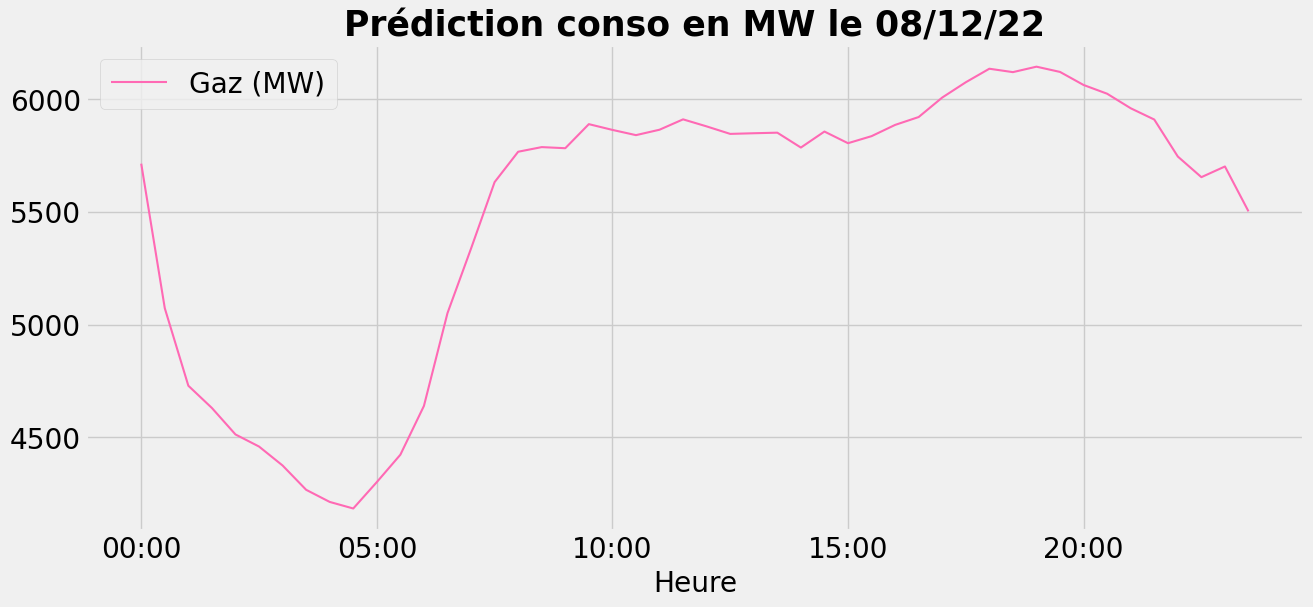

In [5]:
data1 = data.copy()
data1 = data[['Heure', 'Gaz (MW)']]                    # on récupère que les données qui nous intéressent de notre dataframe de départ
data1.dropna(inplace = True)                           # on supprime l'ensemble des valeurs manquantes s'il y en a  
data1 = data1.sort_values(by='Heure', ascending=True)  # on ré-arrange nos données en les triant par heures égales
data1.set_index('Heure', inplace=True)                 # on indexe sur les heures afin que les données soient plus facilement manipulables 
#print(data1)
moy1 = data1.groupby(["Heure"])['Gaz (MW)'].mean()     # on calcule la moyenne de la consommation en gaz en fonction des heures 

## Affichage graphique 
plt.figure()
Gaz = moy1.plot(color='hotpink')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend()

In [6]:
df_gaz = moy1.to_frame()  # on convertit en dataframe juste pour que l'affichage sous forme de tableau soit plus 'joli'
df_gaz

,Gaz (MW)
Heure,
00:00,5712.7
00:30,5072.6
01:00,4729.3
01:30,4630.7
02:00,4513.5
02:30,4460.0
03:00,4376.0
03:30,4268.4
04:00,4214.7


## Etude du Fioul

C:\Users\Pauline\AppData\Local\Temp\ipykernel_13356\1952496119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(inplace = True)


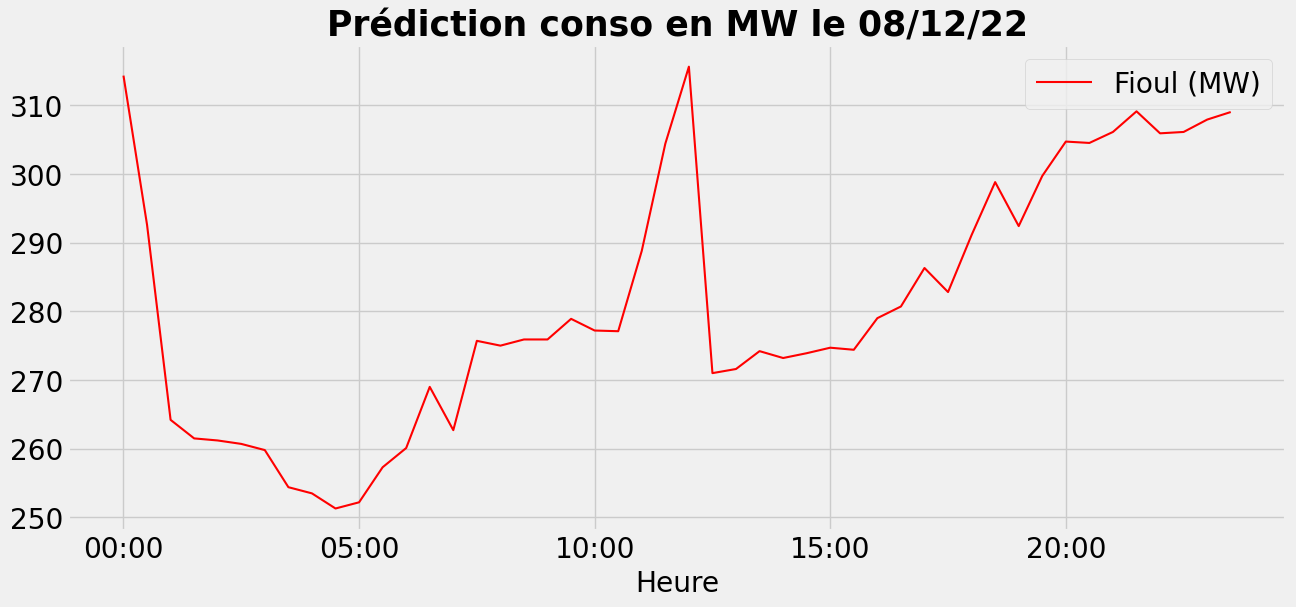

In [7]:
data2 = data[['Heure', 'Fioul (MW)']]
data2.dropna(inplace = True)
data2 = data2.sort_values(by='Heure', ascending=True)
data2.set_index('Heure', inplace=True)
#print(data2)
moy2 = data2.groupby(["Heure"])['Fioul (MW)'].mean()

plt.figure()
Fioul = moy2.plot(color='red')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend()

In [8]:
df_fioul = moy2.to_frame()
df_fioul

,Fioul (MW)
Heure,
00:00,314.3
00:30,292.6
01:00,264.2
01:30,261.5
02:00,261.2
02:30,260.7
03:00,259.8
03:30,254.4
04:00,253.5


## Etude du Charbon 

C:\Users\Pauline\AppData\Local\Temp\ipykernel_13356\906334309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.dropna(inplace = True)


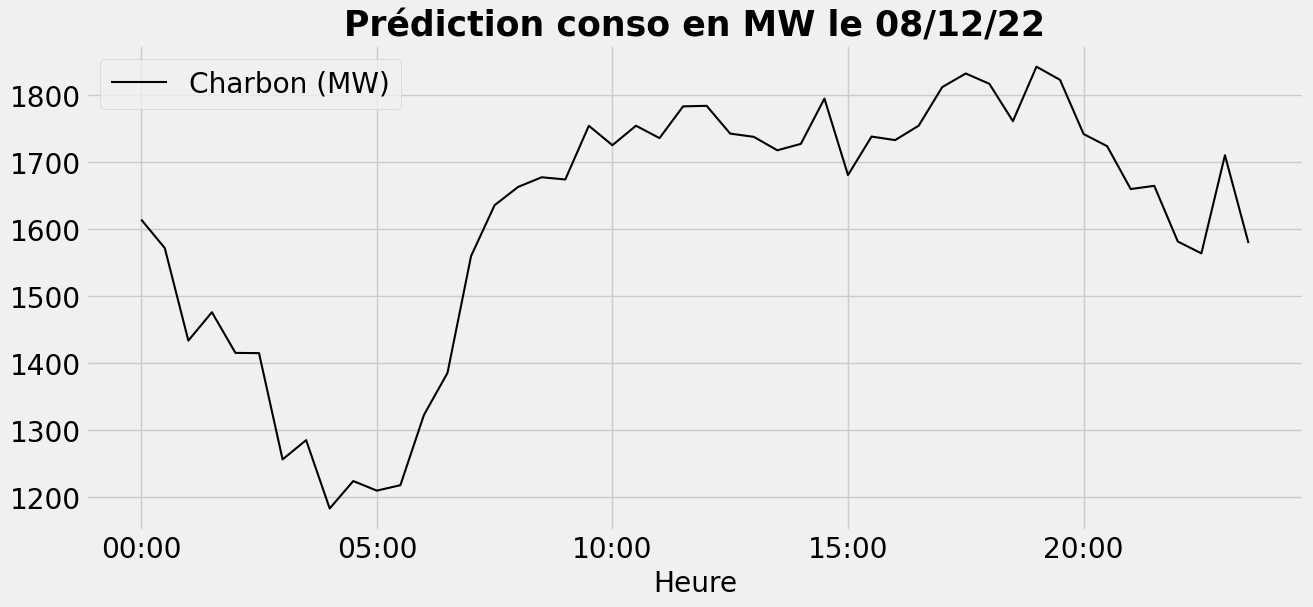

In [9]:
data3 = data[['Heure', 'Charbon (MW)']]
data3.dropna(inplace = True)
data3 = data3.sort_values(by='Heure', ascending=True)
data3.set_index('Heure', inplace=True)
#print(data3)
moy3 = data3.groupby(["Heure"])['Charbon (MW)'].mean()

plt.figure()
Charbon = moy3.plot(color='black')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend() 

In [10]:
df_charbon = moy3.to_frame()
df_charbon

,Charbon (MW)
Heure,
00:00,1614.5
00:30,1571.9
01:00,1433.7
01:30,1476.1
02:00,1415.3
02:30,1415.0
03:00,1256.2
03:30,1285.0
04:00,1182.9


## Etude du Nucléaire 

C:\Users\Pauline\AppData\Local\Temp\ipykernel_13356\1735584260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.dropna(inplace = True)


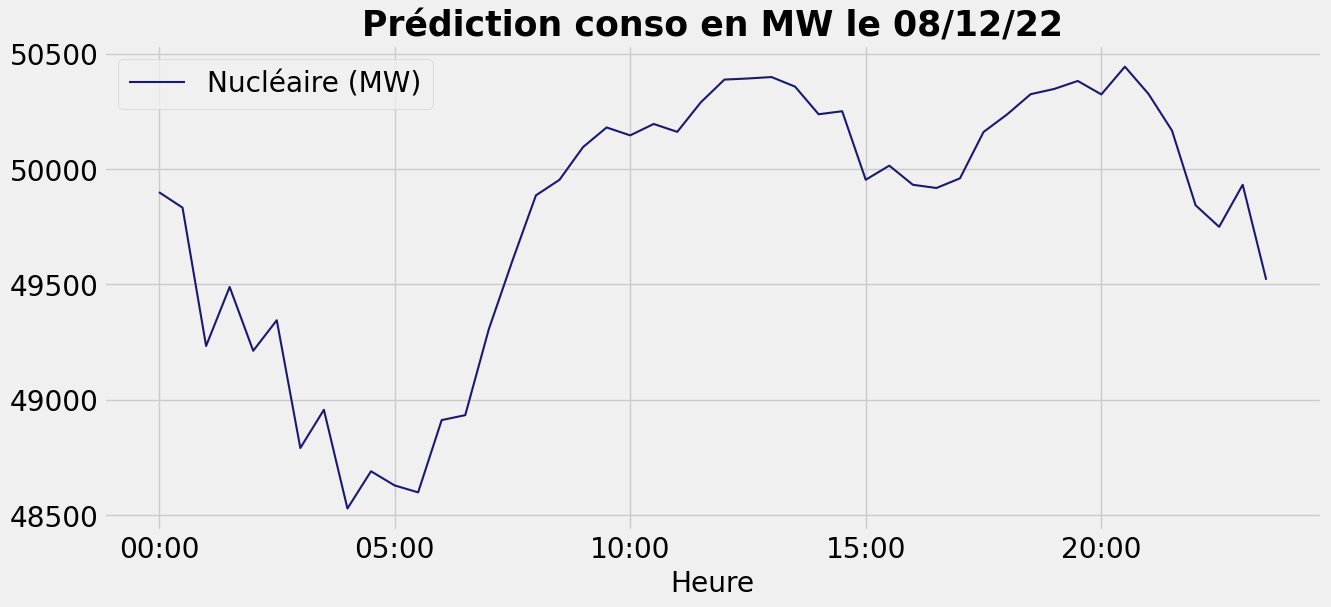

In [11]:
data4 = data[['Heure', 'Nucléaire (MW)']]
data4.dropna(inplace = True)
data4 = data4.sort_values(by='Heure', ascending=True)
data4.set_index('Heure', inplace=True)
#print(data4)
moy4 = data4.groupby(["Heure"])['Nucléaire (MW)'].mean()

plt.figure()
Nucléaire = moy4.plot(color='midnightblue')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend()

In [12]:
df_nucleaire = moy4.to_frame()
df_nucleaire

,Nucléaire (MW)
Heure,
00:00,49899.6
00:30,49832.5
01:00,49232.9
01:30,49488.7
02:00,49212.2
02:30,49344.6
03:00,48790.8
03:30,48956.5
04:00,48528.7


## Etude de l'Eolien, de l'Hydraulique et du Solaire


C:\Users\Pauline\AppData\Local\Temp\ipykernel_13356\131970146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5.dropna(inplace = True)


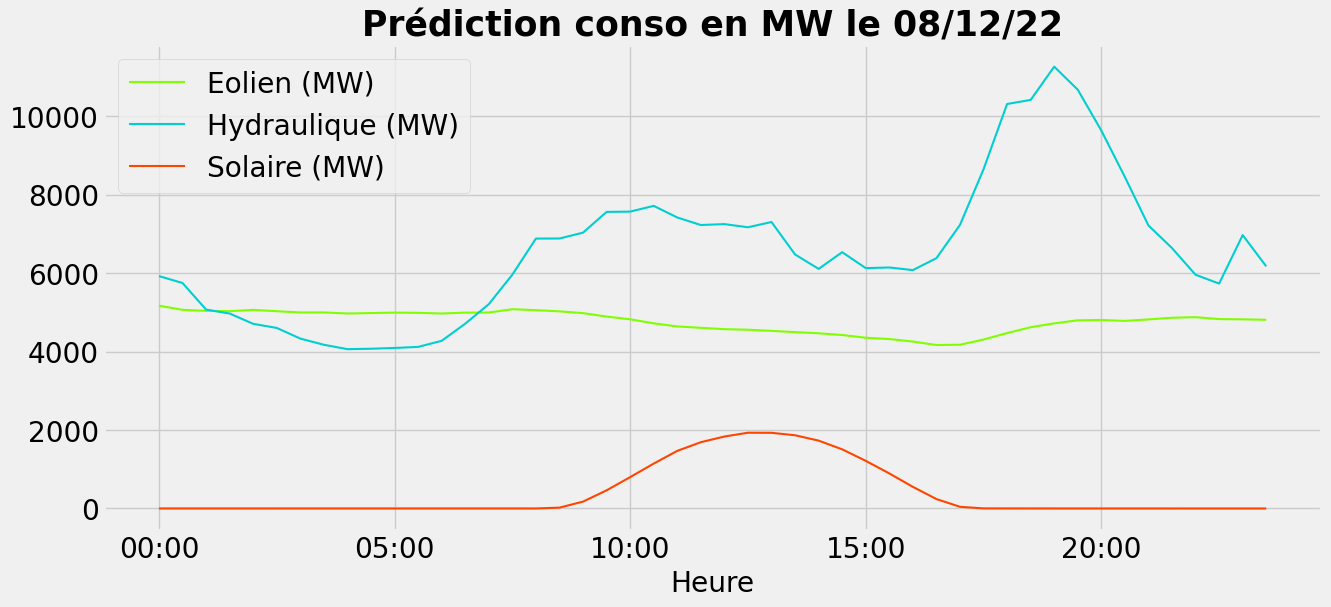

In [13]:
data5 = data[['Heure', 'Eolien (MW)', 'Hydraulique (MW)', 'Solaire (MW)']]
data5.dropna(inplace = True)
data5 = data5.sort_values(by='Heure', ascending=True)
data5.set_index('Heure', inplace=True)
#print(data5)
moy51 = data5.groupby(["Heure"])['Eolien (MW)'].mean()
moy52 = data5.groupby(["Heure"])['Hydraulique (MW)'].mean()
moy53 = data5.groupby(["Heure"])['Solaire (MW)'].mean()

plt.figure()
Eolien = moy51.plot(color='chartreuse')
Hydraulique = moy52.plot(color='darkturquoise')
Solaire = moy53.plot(color='orangered')
plt.title('Prédiction conso en MW le 08/12/22')
plt.legend()

In [14]:
df_eolien = moy51.to_frame()
df_eolien

,Eolien (MW)
Heure,
00:00,5171.7
00:30,5065.1
01:00,5038.5
01:30,5030.8
02:00,5063.3
02:30,5030.0
03:00,4998.0
03:30,4997.8
04:00,4971.6


In [15]:
df_hydraulique = moy52.to_frame()
df_hydraulique

,Hydraulique (MW)
Heure,
00:00,5925.0
00:30,5748.6
01:00,5071.6
01:30,4970.3
02:00,4707.6
02:30,4603.2
03:00,4331.3
03:30,4174.3
04:00,4062.0


In [16]:
df_solaire = moy53.to_frame()
df_solaire

,Solaire (MW)
Heure,
00:00,0.4
00:30,0.6
01:00,0.6
01:30,0.5
02:00,0.3
02:30,0.5
03:00,0.5
03:30,0.6
04:00,0.6


## Comparaison avec le module Prophet  

In [17]:
from prophet import Prophet
import pandas as pd
import pooch 
import os
import matplotlib.pyplot as plt
import pylab

In [18]:
#Téléchargement des données de 2022:
url2="https://odre.opendatasoft.com/explore/dataset/eco2mix-national-tr/download/?format=csv&disjunctive.nature=true&q=date_heure:%5B2022-05-31T22:00:00Z+TO+2022-11-29T22:59:59Z%5D&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"
path_target = './consommation_2022.csv'
path, fname = os.path.split(path_target)
pooch.retrieve(url2, path=path, fname=fname, known_hash=None)
# Chargement du dataset "consommation.csv"
data1 = pd.read_csv("consommation_2022.csv", delimiter=";", comment="#", na_values="n/d",parse_dates=['Date'], converters={'heure' : str})


Nous avons fait le choix de comparer seulement quatre sources d'énergie afin de ne pas alourdir le projet. 

### Etude du Gaz


In [19]:
df3 = data1.copy()
df3 = data1[['Date', 'Heure', 'Gaz (MW)']]                   
df3 = df3.rename(columns={'Date' : 'ds', 'Gaz (MW)' : 'y'})
df3 = df3.dropna()
df3 = df3.sort_values(by=['ds','Heure'], ascending=(True,True))
df3['ds'] = pd.to_datetime(df3['ds'])
model2 = Prophet()
model2.fit(df3)
f2 = model2.make_future_dataframe(periods=48*10 , freq='30min', include_history=False)
predic1 = model2.predict(f2)
s = predic1[['ds','yhat']]
predic_finale1 = s[len(s)-49:479]
predic_finale1 = predic_finale1.rename(columns={'ds' : 'Date et Heure', 'yhat' : 'Gaz(MW)'})
(predic_finale1)

18:08:19 - cmdstanpy - INFO - Chain [1] start processing
18:08:26 - cmdstanpy - INFO - Chain [1] done processing


,Date et Heure,Gaz(MW)
431,2022-12-08 00:00:00,6455.626011
432,2022-12-08 00:30:00,6455.381151
433,2022-12-08 01:00:00,6455.291460
434,2022-12-08 01:30:00,6455.368950
435,2022-12-08 02:00:00,6455.624851
436,2022-12-08 02:30:00,6456.069541
437,2022-12-08 03:00:00,6456.712495
438,2022-12-08 03:30:00,6457.562219
439,2022-12-08 04:00:00,6458.626198
440,2022-12-08 04:30:00,6459.910845


Nous allons à présent comparer nos résultats obtenus avec ceux obtenus lors de la première méthode.

In [21]:
# Creation du dataframe qui contiendra les deux prédictions et leur différence
df_gaz1 = df_gaz.reset_index()
df_gaz2 = df_gaz1[['Gaz (MW)']]
list_gaz = df_gaz2.to_numpy()
result1 = pd.DataFrame(list_gaz, columns = ['D1'])

gaz = pd.DataFrame(predic_finale1)
gaz1 = gaz[['Gaz(MW)']]
list_gaz2 = gaz1.to_numpy()
result2 = pd.DataFrame(list_gaz2, columns = ['D2'])

result = result1
result = result.assign(D2 = result2)
#print(result)

# calcul de la difference entre les deux méthodes pour chaque demie-heure
def x(a,b):
    return abs(a - b)

result['abs(D1 - D2)'] = result.apply(lambda f: x(f['D1'],f['D2']), axis=1)
#print(result)

# calcul de la difference en moyenne
Diff1 = result['abs(D1 - D2)'].mean()

In [23]:
print('En moyenne la différence des deux méthodes est de', Diff1, 'MW')

En moyenne la différence des deux méthodes est de 1018.2930678202232 MW


Text(0.5, 1.0, 'Comparaison Gaz')

<Figure size 1400x600 with 0 Axes>

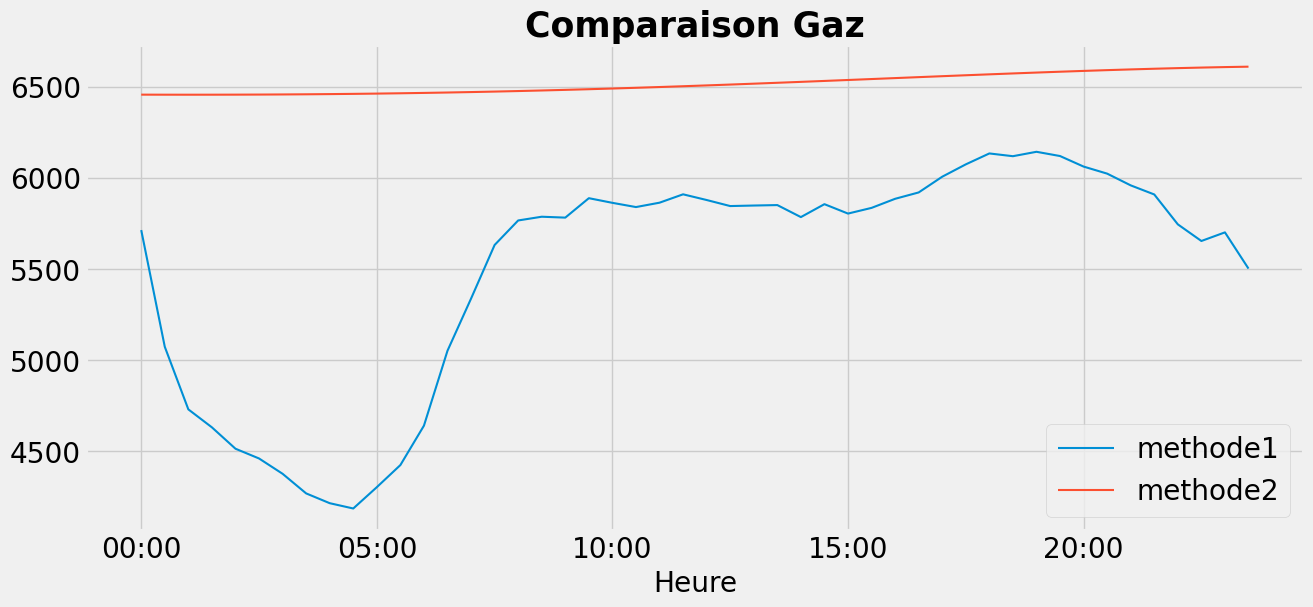

In [34]:
# Affichage graphique 
idee2 = df_gaz1[['Heure']]
idee2 = idee2.assign( methode1 = result1)
idee2 = idee2.assign( methode2 = result2)

plt.figure()
idee2.plot(x='Heure')
plt.title('Comparaison Gaz')

### Etude du Fioul

In [25]:
df2 = data1.copy()
df2 = data1[['Date', 'Heure', 'Fioul (MW)']]                   
df2 = df2.rename(columns={'Date' : 'ds', 'Fioul (MW)' : 'y'})
df2 = df2.dropna()
df2 = df2.sort_values(by=['ds','Heure'], ascending=(True,True))
df2['ds'] = pd.to_datetime(df2['ds'])
model1 = Prophet()
model1.fit(df2)
f = model1.make_future_dataframe(periods=48*10 , freq='30min', include_history=False)
predic = model1.predict(f)
s = predic[['ds','yhat']]
predic_finale = s[len(s)-49:479]
predic_finale = predic_finale.rename(columns={'ds' : 'Date et Heure', 'yhat' : 'Fioul(MW)'})
(predic_finale)

18:21:54 - cmdstanpy - INFO - Chain [1] start processing
18:22:02 - cmdstanpy - INFO - Chain [1] done processing


,Date et Heure,Fioul(MW)
431,2022-12-08 00:00:00,230.650878
432,2022-12-08 00:30:00,229.559110
433,2022-12-08 01:00:00,228.514140
434,2022-12-08 01:30:00,227.517008
435,2022-12-08 02:00:00,226.568607
436,2022-12-08 02:30:00,225.669673
437,2022-12-08 03:00:00,224.820791
438,2022-12-08 03:30:00,224.022391
439,2022-12-08 04:00:00,223.274750
440,2022-12-08 04:30:00,222.577989


Nous allons comparer les deux méthodes :

In [26]:
# Creation du dataframe qui contiendra les deux prédictions et leur différence
df_fioul1 = df_fioul.reset_index()
df_fioul2 = df_fioul1[['Fioul (MW)']]
list_fioul = df_fioul2.to_numpy()
result3 = pd.DataFrame(list_fioul, columns = ['D3'])

fioul = pd.DataFrame(predic_finale)
fioul1 = fioul[['Fioul(MW)']]
list_fioul2 = fioul1.to_numpy()
result4 = pd.DataFrame(list_fioul2, columns = ['D4'])

resultF = result3
resultF = resultF.assign(D4 = result4)
#print(resultF)

def x(a,b):
    return abs(a - b)

resultF['abs(D3 - D4)'] = resultF.apply(lambda f: x(f['D3'],f['D4']), axis=1)
#print(resultF)

Diff2 = resultF['abs(D3 - D4)'].mean()

In [27]:
print('En moyenne la différence des deux méthodes est de', Diff2, 'MW')

En moyenne la différence des deux méthodes est de 60.21330783107024 MW


Text(0.5, 1.0, 'Comparaison Fioul')

<Figure size 1400x600 with 0 Axes>

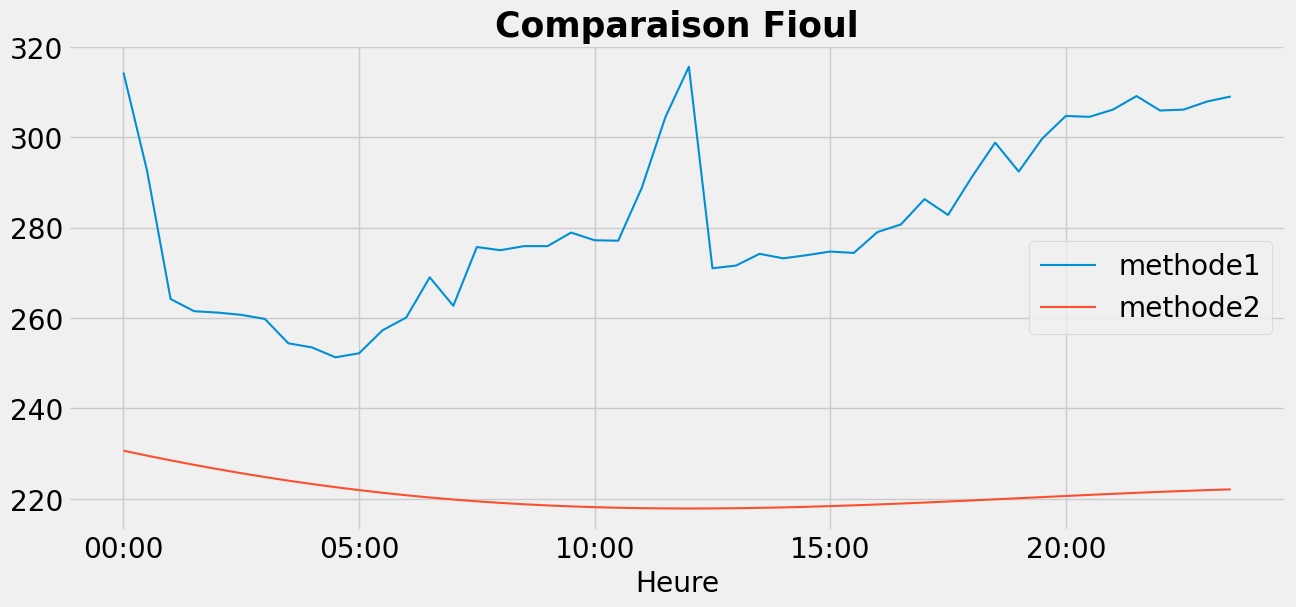

In [33]:
# Affichage graphique 
idee1 = df_fioul1[['Heure']]
idee1 = idee1.assign( methode1 = result3)
idee1 = idee1.assign( methode2 = result4)

plt.figure()
idee1.plot(x='Heure')
plt.title('Comparaison Fioul')

### Etude de l'Hydraulique

In [28]:
df4 = data1.copy()
df4 = data1[['Date', 'Heure', 'Hydraulique (MW)']]                   
df4 = df4.rename(columns={'Date' : 'ds', 'Hydraulique (MW)' : 'y'})
df4 = df4.dropna()
df4 = df4.sort_values(by=['ds','Heure'], ascending=(True,True))
df4['ds'] = pd.to_datetime(df4['ds'])
model3 = Prophet()
model3.fit(df4)
f3 = model3.make_future_dataframe(periods=48*10 , freq='30min', include_history=False)
predic2 = model3.predict(f3)
s = predic2[['ds','yhat']]
predic_finale2 = s[len(s)-49:479]
predic_finale2 = predic_finale2.rename(columns={'ds' : 'Date et Heure', 'yhat' : 'Hydraulique(MW)'})
(predic_finale2)

18:27:04 - cmdstanpy - INFO - Chain [1] start processing
18:27:11 - cmdstanpy - INFO - Chain [1] done processing


,Date et Heure,Hydraulique(MW)
431,2022-12-08 00:00:00,6924.227753
432,2022-12-08 00:30:00,6921.828696
433,2022-12-08 01:00:00,6919.365572
434,2022-12-08 01:30:00,6916.848754
435,2022-12-08 02:00:00,6914.288375
436,2022-12-08 02:30:00,6911.694278
437,2022-12-08 03:00:00,6909.075967
438,2022-12-08 03:30:00,6906.442555
439,2022-12-08 04:00:00,6903.802719
440,2022-12-08 04:30:00,6901.164656


Nous allons comparer les deux méthodes :

In [29]:
# Creation du dataframe qui contiendra les deux prédictions et leur différence
df_hyd1 = df_hydraulique.reset_index()
df_hyd2 = df_hyd1[['Hydraulique (MW)']]
list_hyd = df_hyd2.to_numpy()
result5 = pd.DataFrame(list_hyd, columns = ['D5'])

hyd = pd.DataFrame(predic_finale2)
hyd1 = hyd[['Hydraulique(MW)']]
list_hyd2 = hyd1.to_numpy()
result6 = pd.DataFrame(list_hyd2, columns = ['D6'])

resultH = result5
resultH = resultH.assign(D6 = result6)

def x(a,b):
    return abs(a - b)


resultH['abs(D5 - D6)'] = resultH.apply(lambda f: x(f['D5'],f['D6']), axis=1)
#print(resultH)

Diff3 = resultH['abs(D5 - D6)'].mean()

In [30]:
print('En moyenne la différence des deux méthodes est de', Diff3, 'MW')

En moyenne la différence des deux méthodes est de 1421.6633660903556 MW


Text(0.5, 1.0, 'Comparaison Hydraulique')

<Figure size 1400x600 with 0 Axes>

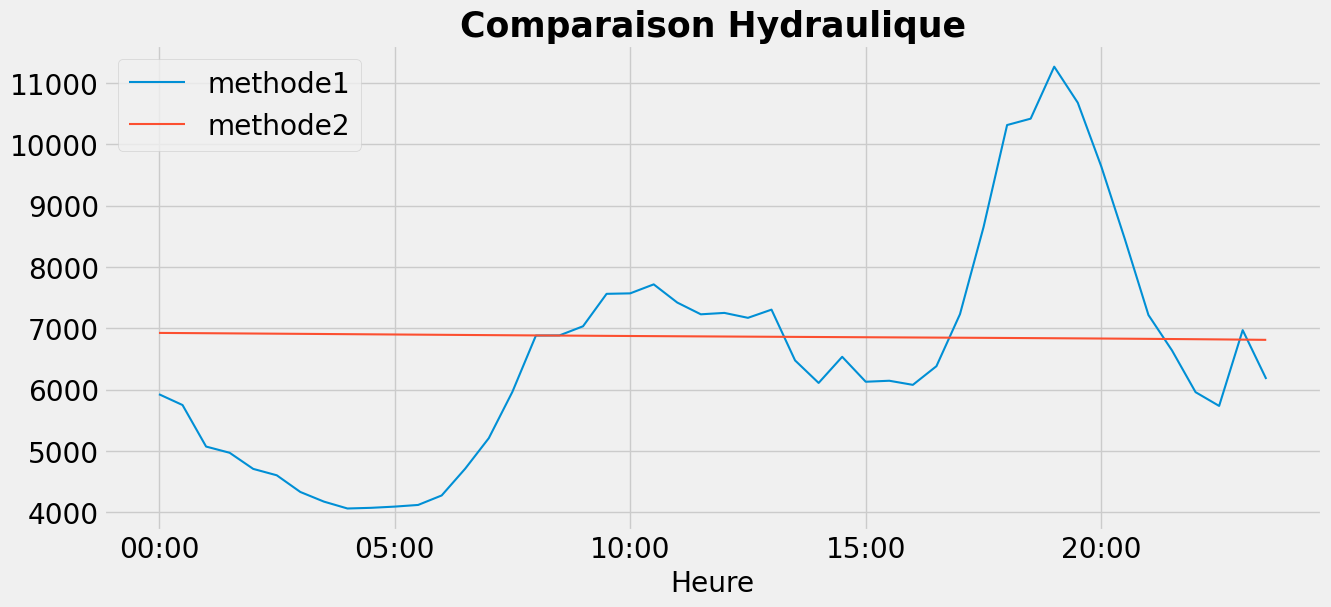

In [31]:
# Affichage graphique 
idee3 = df_hyd1[['Heure']]
idee3 = idee3.assign( methode1 = result5)
idee3 = idee3.assign( methode2 = result6)

plt.figure()
idee3.plot(x='Heure')
plt.title('Comparaison Hydraulique')

### Etude du Nucléaire


In [36]:
df5 = data1.copy()
df5 = data1[['Date', 'Heure', 'Nucléaire (MW)']]                   
df5 = df5.rename(columns={'Date' : 'ds', 'Nucléaire (MW)' : 'y'})
df5 = df5.dropna()
df5 = df5.sort_values(by=['ds','Heure'], ascending=(True,True))
df5['ds'] = pd.to_datetime(df5['ds'])
model4 = Prophet()
model4.fit(df5)
f4 = model4.make_future_dataframe(periods=48*10 , freq='30min', include_history=False)
predic3 = model4.predict(f4)
s = predic3[['ds','yhat']]
predic_finale3 = s[len(s)-49:479]
predic_finale3 = predic_finale3.rename(columns={'ds' : 'Date et Heure', 'yhat' : 'Nucleaire(MW)'})
(predic_finale3)

19:21:14 - cmdstanpy - INFO - Chain [1] start processing
19:21:28 - cmdstanpy - INFO - Chain [1] done processing


,Date et Heure,Nucleaire(MW)
431,2022-12-08 00:00:00,33154.556117
432,2022-12-08 00:30:00,33156.710381
433,2022-12-08 01:00:00,33159.141002
434,2022-12-08 01:30:00,33161.847872
435,2022-12-08 02:00:00,33164.829682
436,2022-12-08 02:30:00,33168.083895
437,2022-12-08 03:00:00,33171.606721
438,2022-12-08 03:30:00,33175.393101
439,2022-12-08 04:00:00,33179.436692
440,2022-12-08 04:30:00,33183.729853


Nous allons comparer les deux méthodes :


In [37]:
# Creation du dataframe qui contiendra les deux prédictions et leur différence
df_nuc1 = df_nucleaire.reset_index()
df_nuc2 = df_nuc1[['Nucléaire (MW)']]
list_nuc = df_nuc2.to_numpy()
result7 = pd.DataFrame(list_nuc, columns = ['D7'])

nuc = pd.DataFrame(predic_finale3)
nuc1 = nuc[['Nucleaire(MW)']]
list_nuc2 = nuc1.to_numpy()
result8 = pd.DataFrame(list_nuc2, columns = ['D8'])

resultN = result7
resultN = resultN.assign(D8 = result8)

def x(a,b):
    return abs(a - b)

resultN['abs(D7 - D8)'] = resultN.apply(lambda f: x(f['D7'],f['D8']), axis=1)
#print(resultN)

In [38]:
Diff4 = resultN['abs(D7 - D8)'].mean()
print('En moyenne la différence des deux méthodes est de', Diff4, 'MW')

En moyenne la différence des deux méthodes est de 16539.163498959566 MW


Text(0.5, 1.0, 'Comparaison Nucleaire')

<Figure size 1400x600 with 0 Axes>

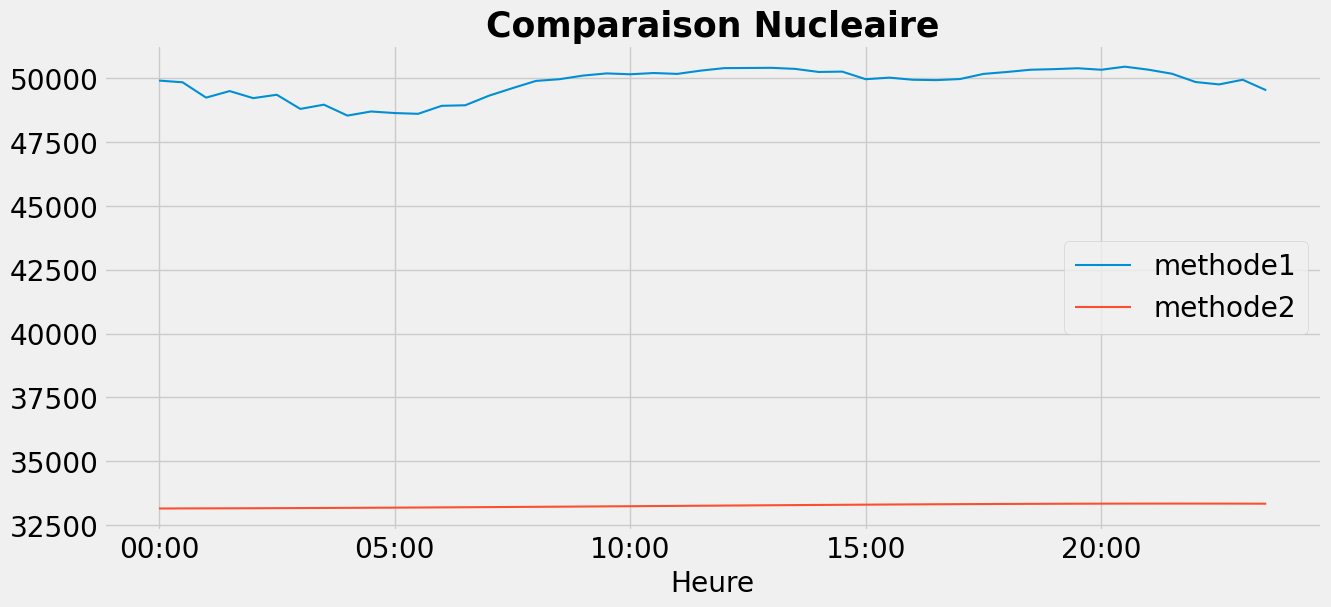

In [42]:
# Affichage graphique 
idee4 = df_nuc1[['Heure']]
idee4 = idee4.assign( methode1 = result7)
idee4 = idee4.assign( methode2 = result8)

plt.figure()
idee4.plot(x='Heure')
plt.title('Comparaison Nucleaire')

On peut observer que, pour les quatres sources d'énergie étudiées, les deux méthodes ne donnent pas des prédictions similaires. Il va falloir maintenant attendre les données du 8 décembre 2022 afin de voir laquelle de ces deux méthodes se rapproche le plus de la réalité.